In [104]:
# use python libraries numpy and scipy
import numpy as np
from scipy.optimize import minimize

# Decision Variables 
# Let x[0] represents X (number of Greek salad to make)
# Let x[1] represents Y (number of Italian salad to make)

# Objective
# Max 5X + 8Y (profit, $)
def objective(x, sign=1.0):
    return sign*(5*x[0] + 8*x[1])

# Derivative of objective
def objective_deriv(x, sign=1.0):
    # Derivative on x[0]
    dfdx0 = sign*(5)
    # Derivative on x[1]
    dfdx1 = sign*(8)
    return np.array([ dfdx0, dfdx1 ])
    
# Subject to

# Constraint1
# 1/2X + 1/3Y <= 500 (vegetable, lbs)
def constraint1(x):
    return 1/2*x[0] + 1/3*x[1] - 500.0

# Constraint2
# 1X + 1Y <= 800 (labor, hour)
def constraint2(x):
    return 1*x[0] + 1*x[1] - 800.0

# Constraint3
# 1/4X + 1/5Y <= 400 (cutting time, hour)
def constraint3(x):
    return 1/3*x[0] + 1/5*x[1] - 400.0

# initial guesses choose number >=0
n = 2
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 2.0

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# bounds >=0 (I use None as no upper boundary)  
b = (0.0,None)
bnds = (b, b)

# merge constraints objects
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'ineq', 'fun': constraint3}
cons = ([con1,con2,con3])

# optimize
# for minimization keep args=(1.0,)
# for maximization use args=(-1.0,)

solution = minimize(objective,x0,args=(-1.0,), jac=objective_deriv, method='SLSQP', bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('X = ' + str(x[0]))
print('Y = ' + str(x[1]))


Initial Objective: 21.0
Final Objective: 2.682609321672346e+33
Solution
X = 2.433914133545711e+32
Y = 1.832065318624363e+32


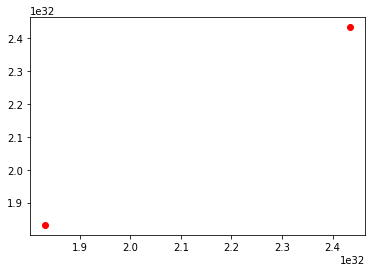

In [105]:
import matplotlib.pylab as plt
N = 8
z = np.linspace(-3,5,100)
plt.plot(x,np.poly1d(x),'ro')
plt.show()
